<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/8%20Artificial%20Neural%20Network/ANNwithOpenCVonMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks - Multi-Layer Perceptrons with OpenCV
## with MNIST Handwritting Digits

https://www.secn.net/article/684929.


https://medium.com/@prtk13061992/mnist-dataset-using-deep-learning-algorithm-ann-c6f83aa594f5

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import cv2
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
def show_random_digits(X, Y, row, col):
    print("The true label is shown in green.")
    _, axarr = plt.subplots(row, col, figsize=(6, 6))
    for i in range(row):
        filter = np.where((Y == i))
        X1, Y1 = X[filter], Y[filter]
        for j in range(col):
            index = np.random.randint(X1.shape[0])
            axarr[i, j].imshow(X1[index], cmap="binary")
            axarr[i, j].axis('off')
            axarr[i, j].text(0.5, 1, str(Y1[index]), fontsize=12, c='g')
    plt.show()

In [3]:
def show_random_result(X, Y, row, col, pred):
    print("The true label is shown in green, and the predicted value is shown within [] in red.")
    _, axarr = plt.subplots(row, col, figsize=(6, 6))
    for i in range(row):
        for j in range(col):
            index = np.random.randint(X.shape[0])
            axarr[i, j].imshow(X[index], cmap="binary")
            axarr[i, j].axis('off')
            axarr[i, j].text(0.5, 1, str(Y[index]), fontsize=12, c='g')
            axarr[i, j].text(10,  1, str(pred[index]), fontsize=12, c='r')
    plt.show()

## Load MNIST Dataset

11493376/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)
The true label is shown in green.


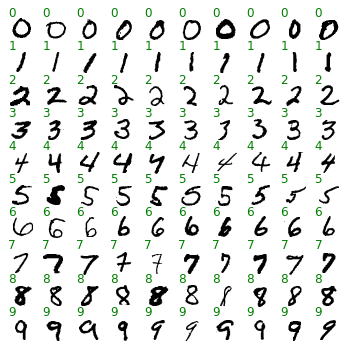

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))
show_random_digits(X_train, y_train, 10, 10)

In [5]:
w, h = X_test[0,:,:].shape
X_train = X_train.reshape(X_train.shape[0], w * h).astype(np.float32)
X_test  = X_test.reshape(  X_test.shape[0], w * h).astype(np.float32)
y_train = np.uint(y_train)
y_test  = np.uint(y_test)
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))

X_train: (60000, 784)
y_train: (60000,)
X_test:  (10000, 784)
y_test:  (10000,)
